In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import sys
import platform
if platform.system() == 'Darwin':
	sys.path.append('/Users/jiadongdan/Dropbox/stempy')
else:
	sys.path.append('D:\\Dropbox\\stempy')

from stempy import io
from stempy.utils import *
from stempy.plot import *
from stempy.datasets import *
from stempy.feature import *
from stempy.manifold import *
from stempy.clustering import *
from stempy.spatial import *

## Load data and extract patches

In [7]:
# size can be estimate by get_patch_size()
size = 71
ds = load_small_mose2_clean()
img = ds.image
pts = ds.pts

kp = KeyPoints(pts, img, size)
ps = kp.extract_patches(size) 

## Display selected patches

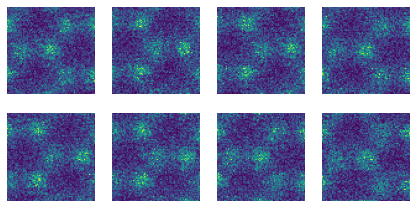

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(7.2, 7.2/2))
for ii, ax in enumerate(axes.ravel()):
    ax.imshow(ps[ii])
    ax.axis('off') 

## Transform into Zernike features

In [9]:
zps = ZPs(n_max=10, size=ps.shape[1])
zps.fit(ps)
X = zps.moments    # rotinv-off
X_rot = X.rotinv() # rotational invariant form (rotinv-on)

## Force-relaxed to get motif labels

In [10]:
fg = ForceGraph8(X = X_rot,
n_neighbors=10,
init_mode = 'pca',
num_iterations = 100,
num_negative_samples=5,
force_params1=(0, 2, 1, 1),
force_params2=(2, 5, 5, 1),
divide=0.5)

xy = fg.fit_transform(X_rot)
lbs = seg_lbs(xy)

Construct graph from data...
Initialize 2-d embedding using PCA layout...


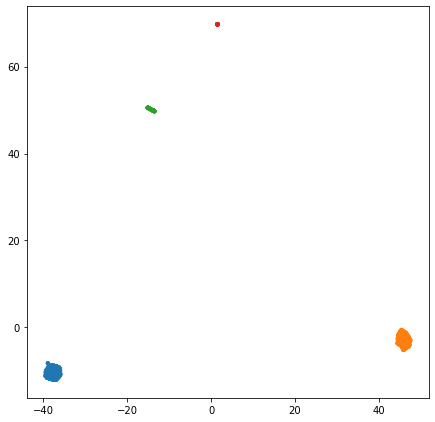

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(7.2, 7.2))
ax.scatter(xy[:, 0], xy[:, 1], color=colors_from_lbs(lbs), s=10) 